LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object
           count          mean           std         min         25%  \
LB        1852.0  1.333247e+02  9.960415e+00  106.000000  126.000000   
AC        1852.0  3.190070e-03  3.785815e-03   -0.000185    0.000000   
FM        1852.0  4.247061e-03  1.360395e-02   -0.005106    0.000000   
UC        1852.0  4.384918e-03  2.910414e-03   -0.000132    0.001965   
DL        1852.0  1.725584e-03  2.702552e-03   -0.000124    0.000000   
DS        1852.0  1.197071e-08  5.880829e-07   -0.0

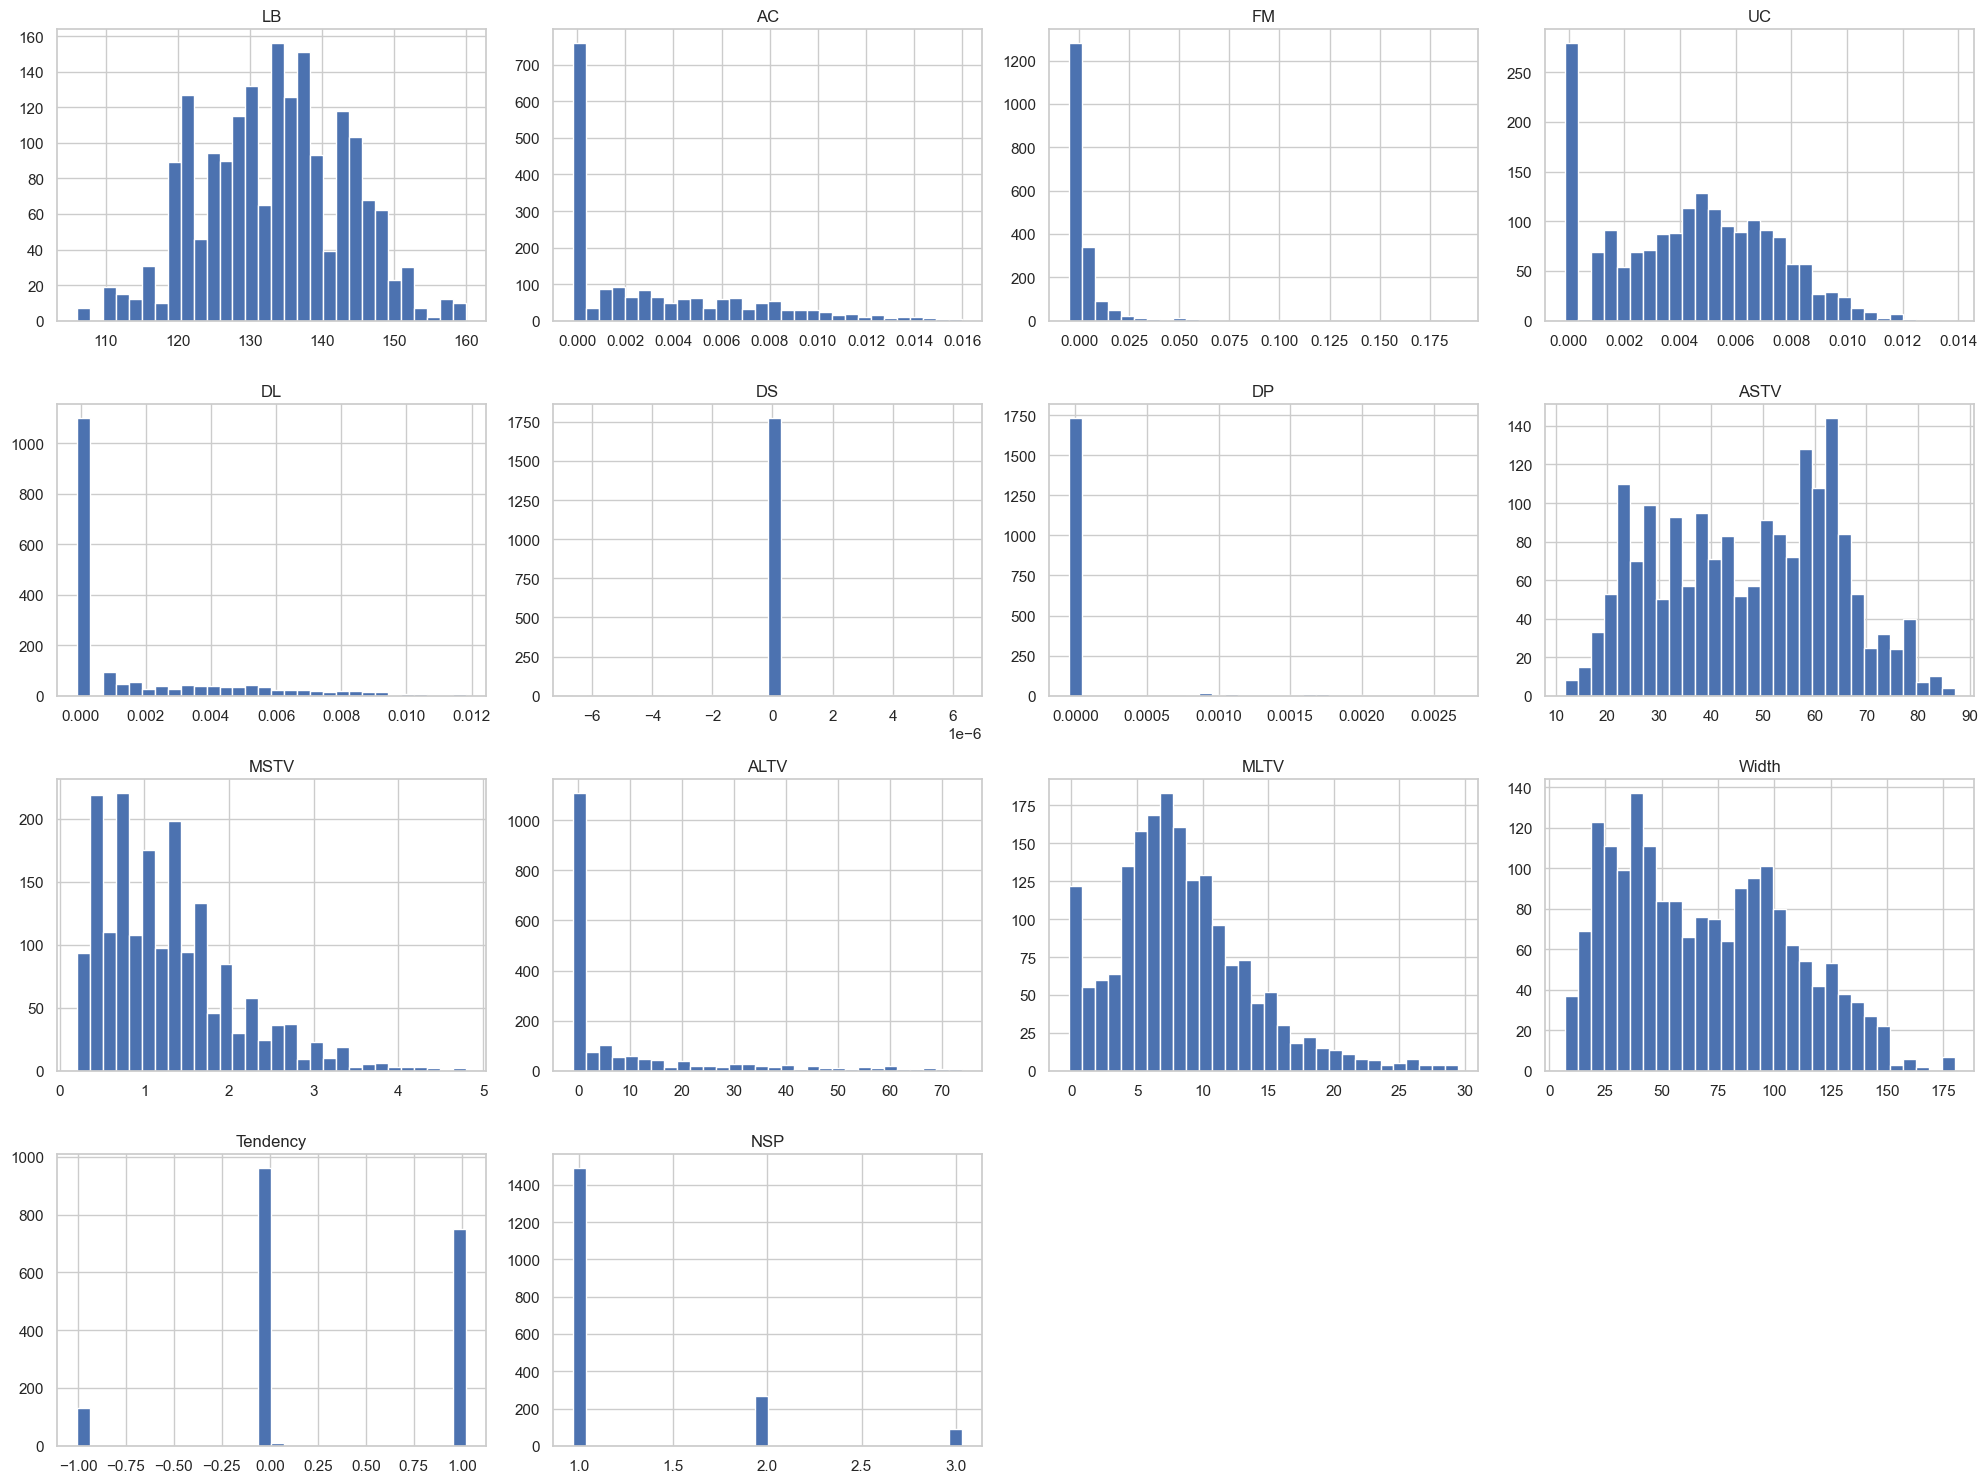

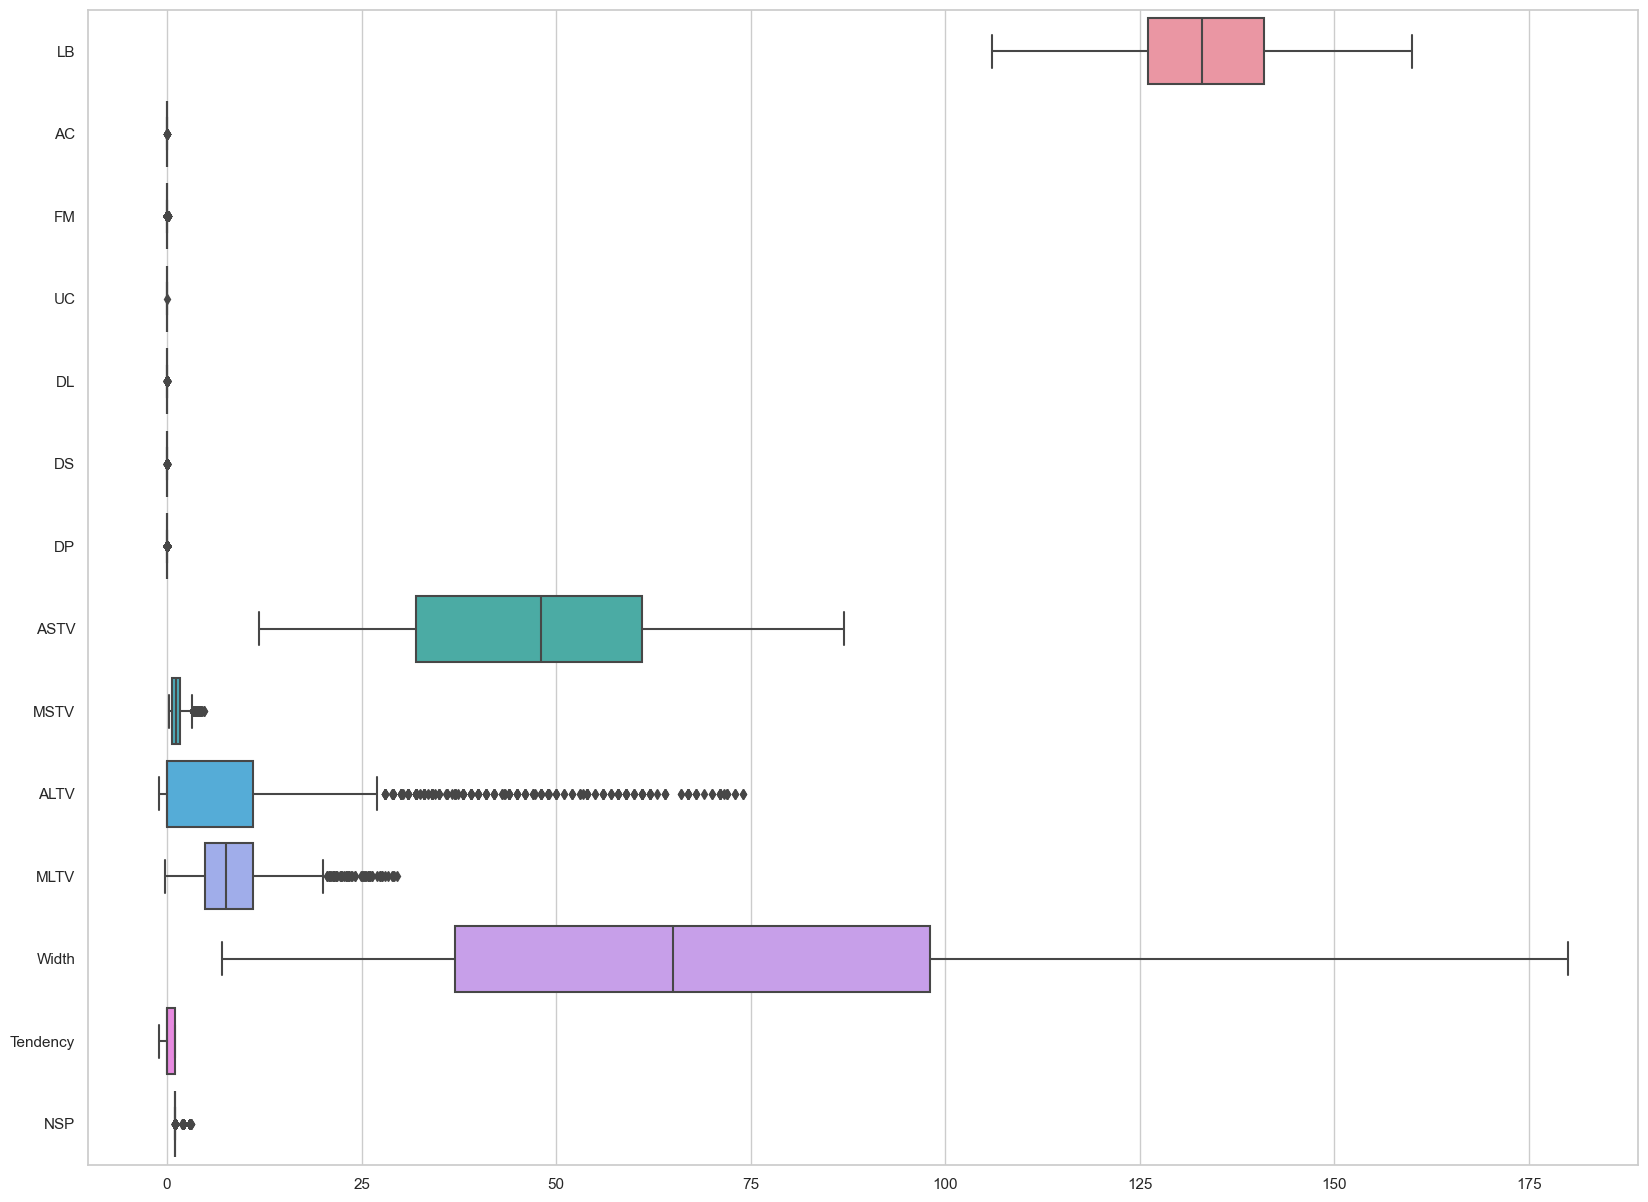

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

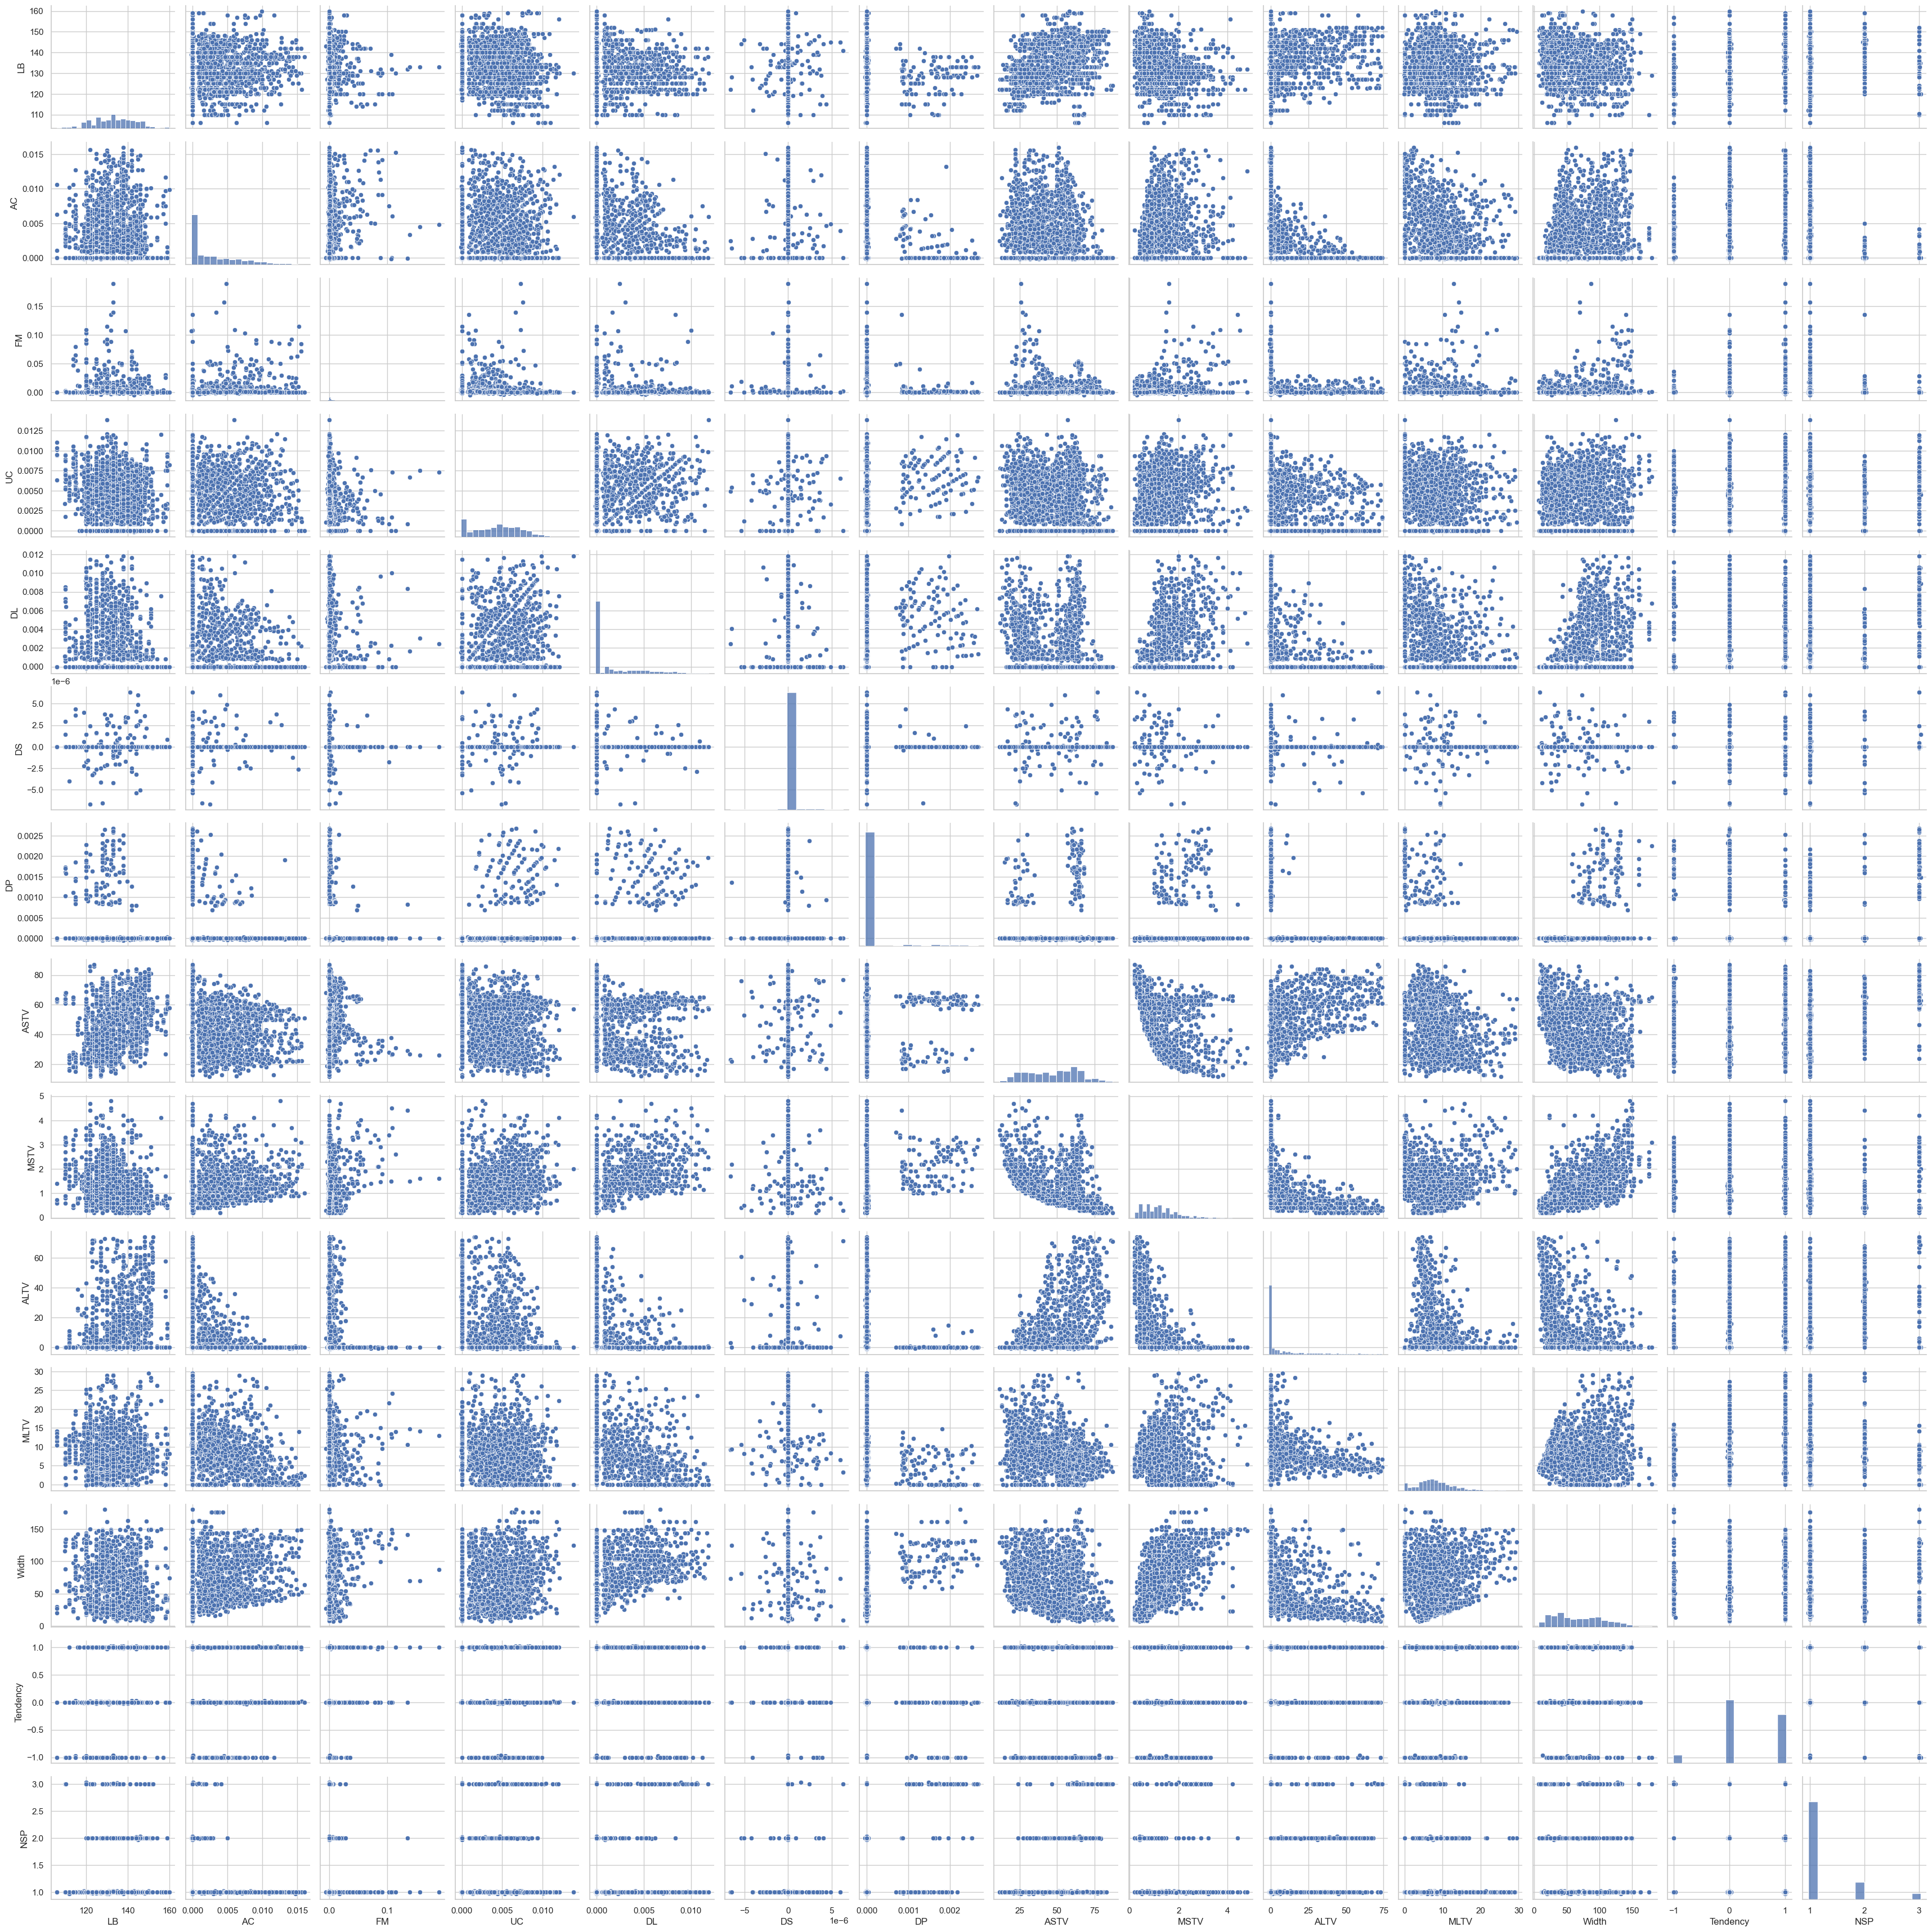

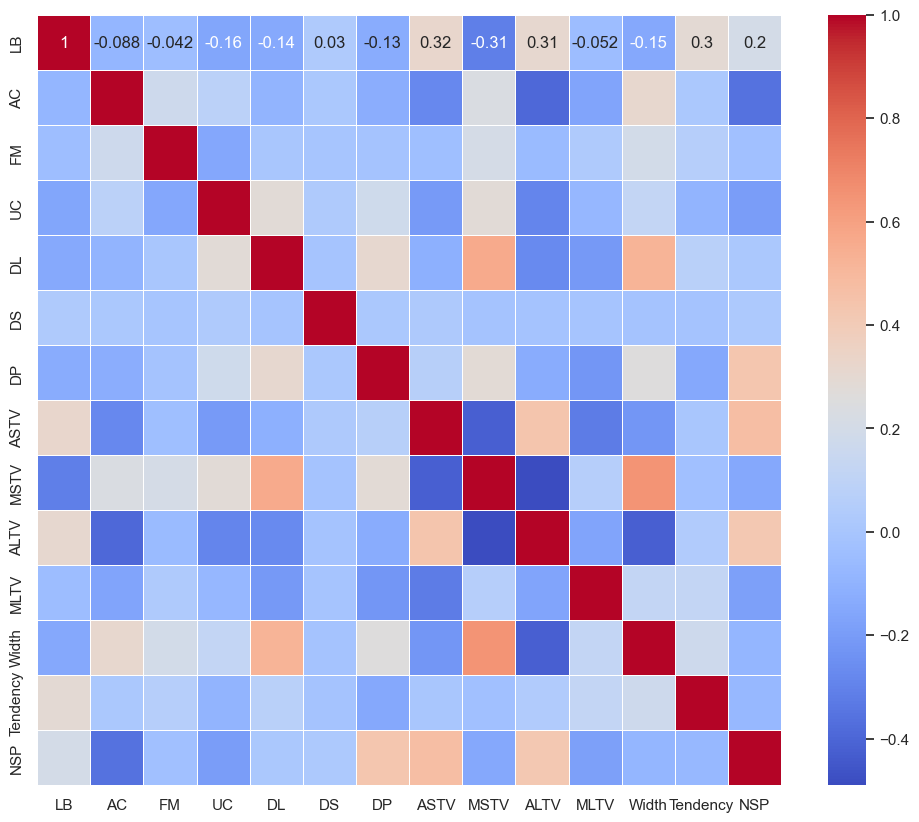

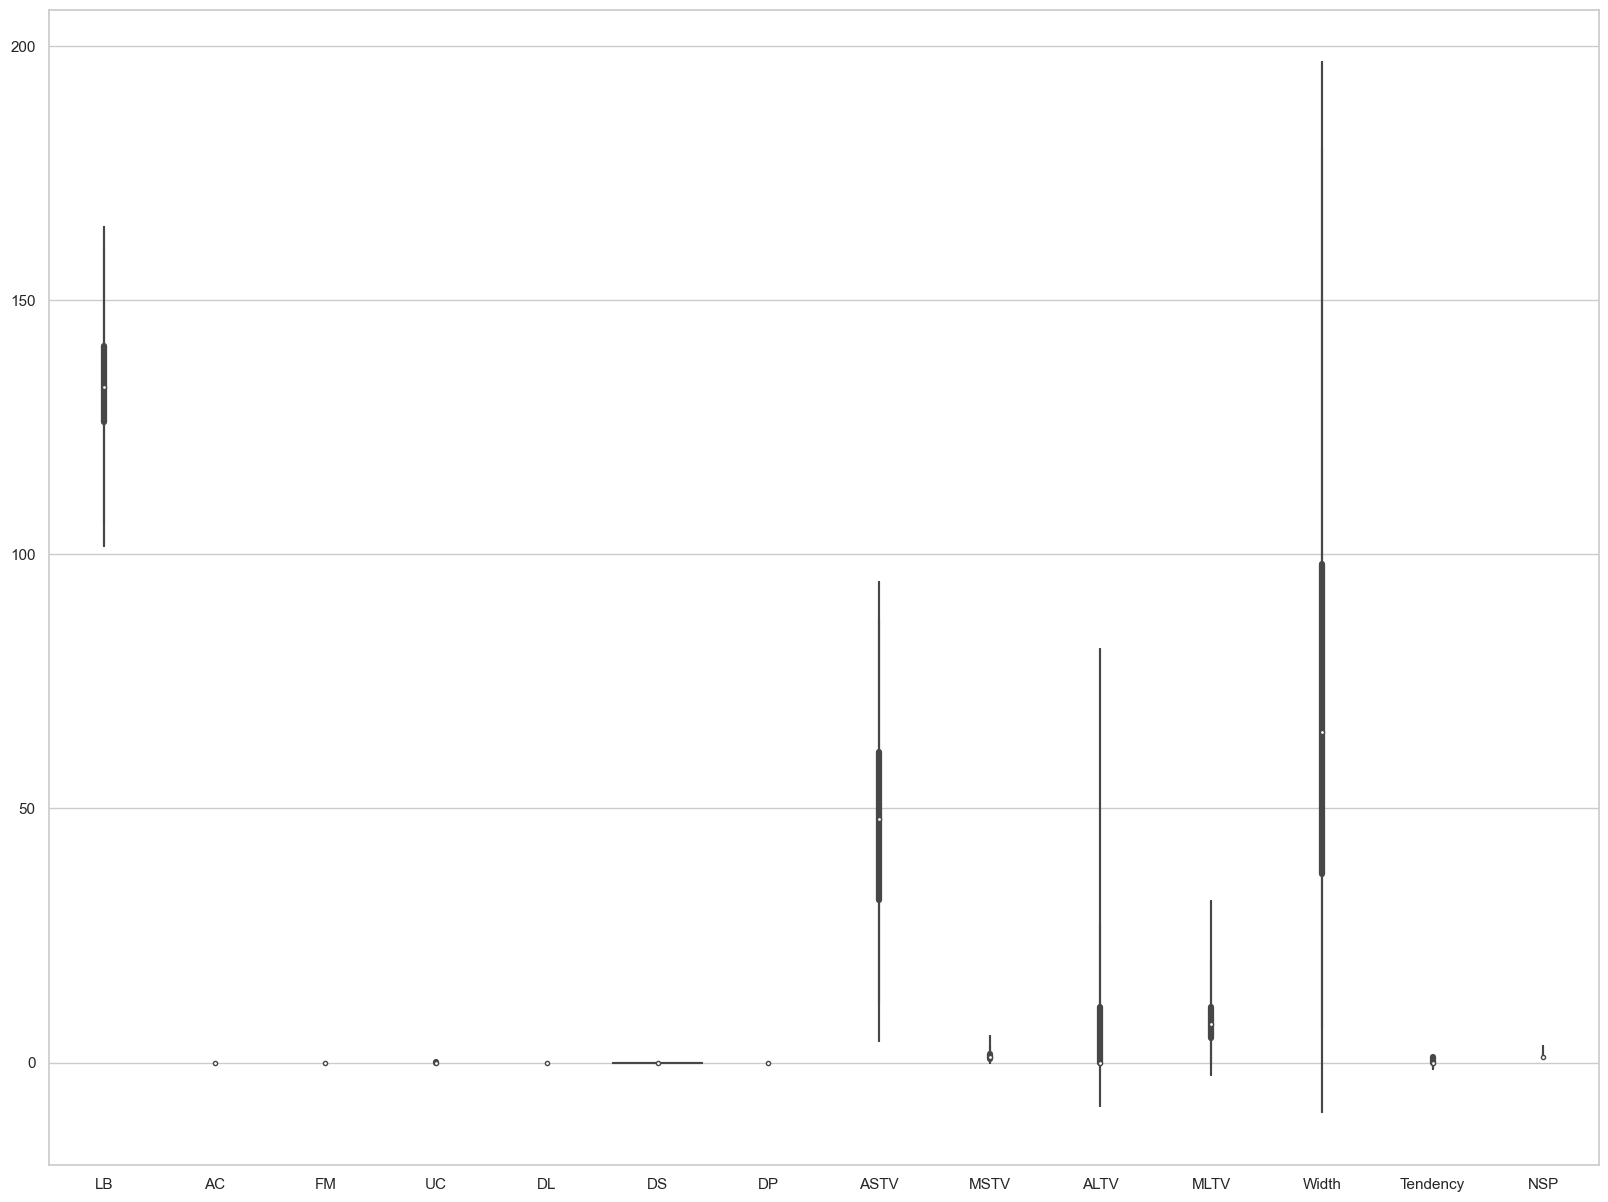

Correlations:
                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.087879 -0.042290 -0.162764 -0.144566  0.030050   
AC       -0.087879  1.000000  0.169951  0.081796 -0.097031  0.011348   
FM       -0.042290  0.169951  1.000000 -0.156579  0.002949 -0.004376   
UC       -0.162764  0.081796 -0.156579  1.000000  0.280573  0.028909   
DL       -0.144566 -0.097031  0.002949  0.280573  1.000000 -0.010151   
DS        0.030050  0.011348 -0.004376  0.028909 -0.010151  1.000000   
DP       -0.129866 -0.126298 -0.015114  0.177768  0.312432  0.013092   
ASTV      0.319767 -0.276639 -0.041320 -0.204720 -0.112411  0.026865   
MSTV     -0.313426  0.233240  0.206941  0.281404  0.563015 -0.013088   
ALTV      0.308419 -0.391042 -0.063088 -0.288396 -0.271951 -0.015280   
MLTV     -0.051618 -0.166951  0.033077 -0.079279 -0.213719 -0.009684   
Width    -0.147165  0.316212  0.196235  0.120047  0.520442 -0.014004   
Tendency  0.295659  0.013896  0.057821 -0.097774  

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualizations
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('Cardiotocographic.csv')

# Display the first few rows of the dataset
df.head()

# Data Cleaning and Preparation
## Checking for missing values
print(df.isnull().sum())

## Handling missing values
# Depending on the dataset, we can either drop missing values or fill them with a statistic (mean, median, etc.)
df = df.dropna()  # or df.fillna(df.mean(), inplace=True)

## Checking data types and correcting if necessary
print(df.dtypes)

# Converting data types if needed
# Example: df['column_name'] = df['column_name'].astype('int')

# Detecting and treating outliers
# Using z-score method to detect outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

# Convert infinite values to NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Statistical Summary
## Calculating summary statistics
summary_stats = df.describe().T
summary_stats['median'] = df.median()
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
print(summary_stats)

## Highlighting interesting findings
# Example: High variance in specific columns, median differences, etc.
print("Interesting Findings:")
print(summary_stats[['mean', 'std', 'median', 'IQR']])

# Data Visualization
## Histograms for numerical variables
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

## Boxplots for numerical variables
plt.figure(figsize=(20, 15))
sns.boxplot(data=df, orient="h")
plt.show()

## Bar charts for categorical variables (if any)
# Assuming 'categorical_var' is a placeholder for actual categorical variable
# df['categorical_var'].value_counts().plot(kind='bar')
# plt.show()

## Scatter plots and correlation heatmap
sns.pairplot(df)
plt.show()

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## Advanced visualization techniques
# Violin plots
plt.figure(figsize=(20, 15))
sns.violinplot(data=df)
plt.show()

# Pattern Recognition and Insights
## Correlations and their implications
print("Correlations:")
print(correlation_matrix)

## Trends or patterns over time (if temporal data is available)
# Assuming 'time_var' is a placeholder for the actual temporal variable
# df['time_var'] = pd.to_datetime(df['time_var'])
# df.set_index('time_var').plot(subplots=True, figsize=(20, 15))
# plt.show()



# Save the cleaned dataset for future use
df.to_csv('cleaned_cardiographic.csv', index=False)